## Step 1 : Reading and Understanding the Data

In [70]:
##import libraries

#To handle data in the form of rows and columns
import pandas as pd

#import numerical libraries
import numpy as np 

#To import seaborn for statistical plots
import seaborn as sns

#To import plotting libraries
import matplotlib.pyplot as plt

#Import Linear Regression machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

from datetime import datetime


# Suppress warnings
import warnings
warnings.filterwarnings(action = 'ignore')

In [71]:
pip install scikit-learn==0.23.2

  Using cached scikit-learn-0.23.2.tar.gz (7.2 MB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [63 lines of output]
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation == "CPython"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation != "CPython"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.8" and platform_system == "AI

In [72]:
bike_df = pd.read_csv('day.csv')
bike_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [73]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [74]:
bike_df.shape

(730, 16)

In [75]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [76]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [77]:
bike_df.nunique() #To check the unique values present in data

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [78]:
bike_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [79]:
bike_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [80]:
# checking for the null values in column data

bike_df.isnull().sum()

instant       0
dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [81]:
bike_df_copy = bike_df.copy()

In [82]:

bike_df_copy.drop_duplicates(inplace=True)

In [83]:
# Encoding/mapping the season column

bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [84]:
bike_df.month = bike_df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [85]:
# Encoding/mapping the weekday column

bike_df.weekday = bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [86]:
# Alternate way to Encode Weekday column
## bike_df['weekday'] = bike_df['weekday'].apply(lambda x: calendar.day_name[x])

In [87]:
# Encoding/mapping the weathersit column

bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [88]:
# Mapping Years
yr_mapping = {
    0: 2018,
    1: 2019,
}

# Apply
bike_df['year'] = bike_df['year'].map(yr_mapping)

In [89]:

bike_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Visualising the data

**Univariate Analysis using Subplot**

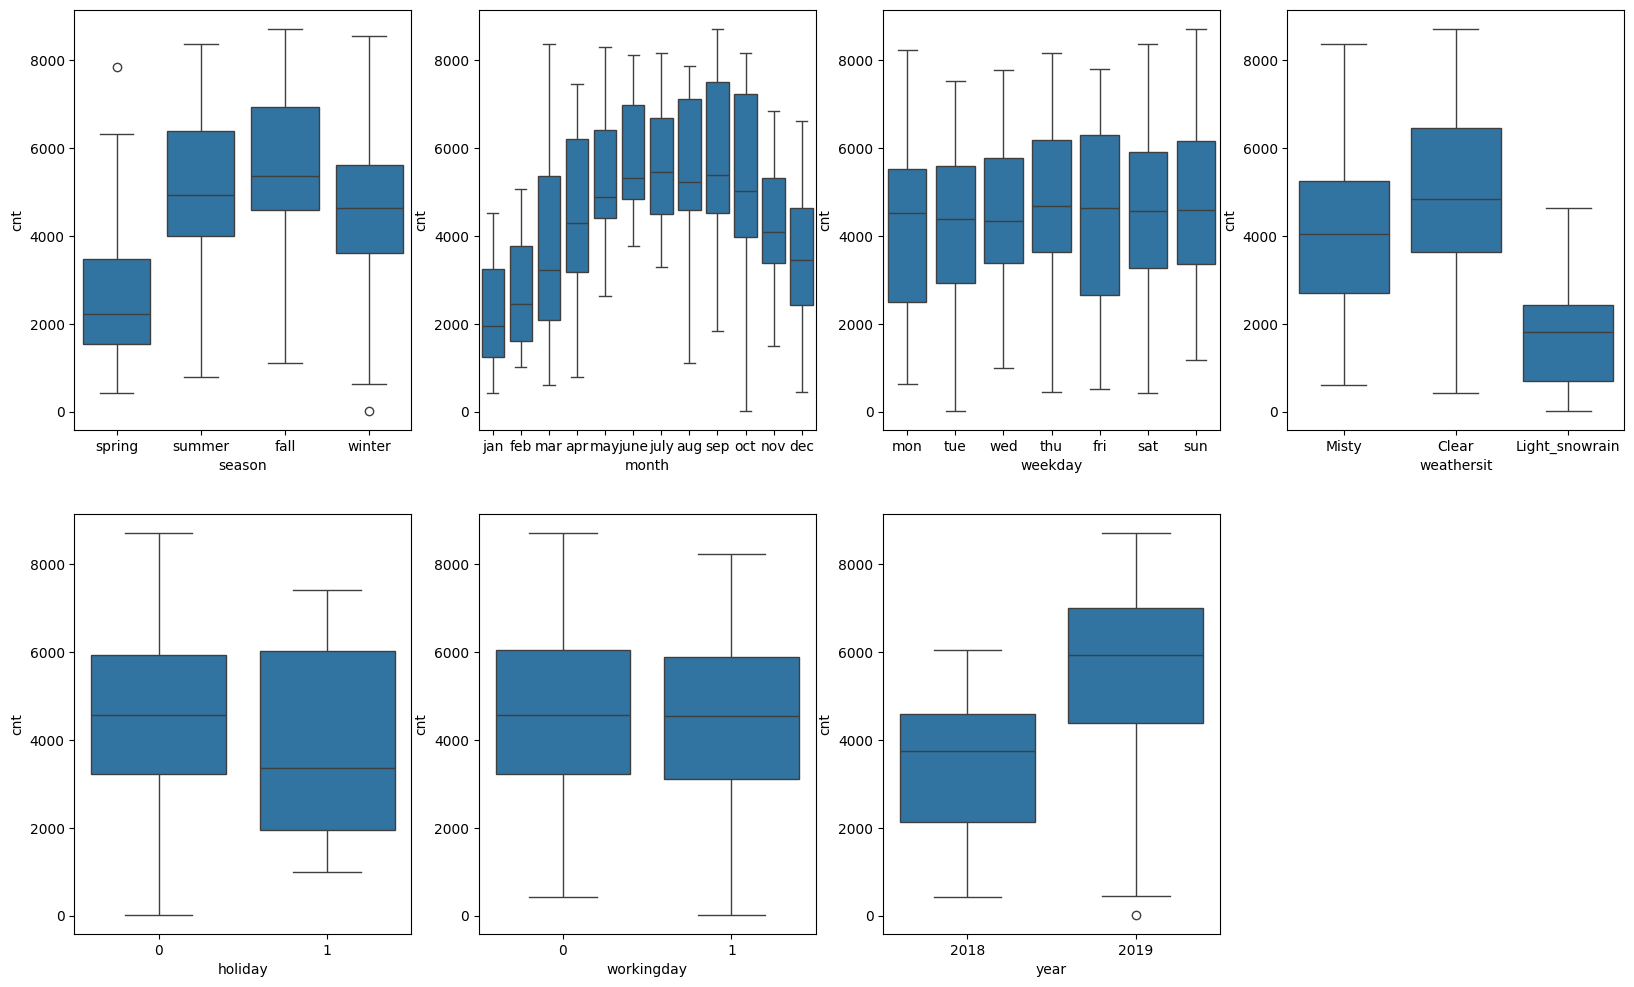

In [90]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable


plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike_df)
plt.show()

## Observations from the Subplots

- Fall season had slightly higer bike rentals than summer 
- 2019 had higher bike rentals than 2018
- July to October saw higher bike rentals.
- Friday saw the most bike rentals

**Univariate Analysis using Countplot(Concise Code)**

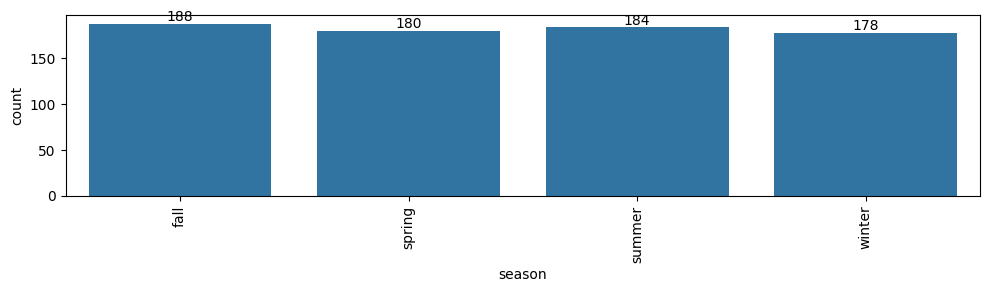

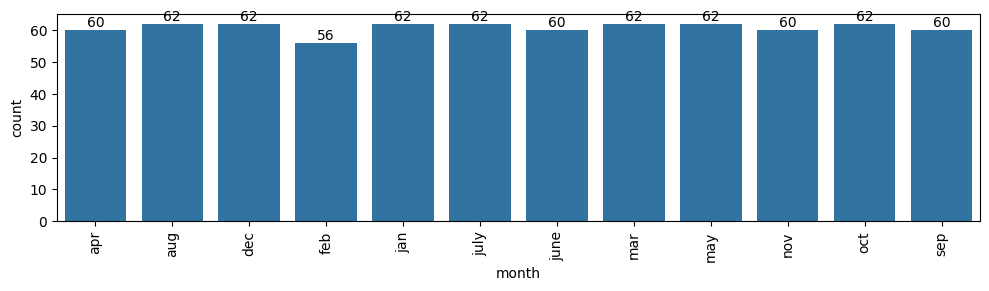

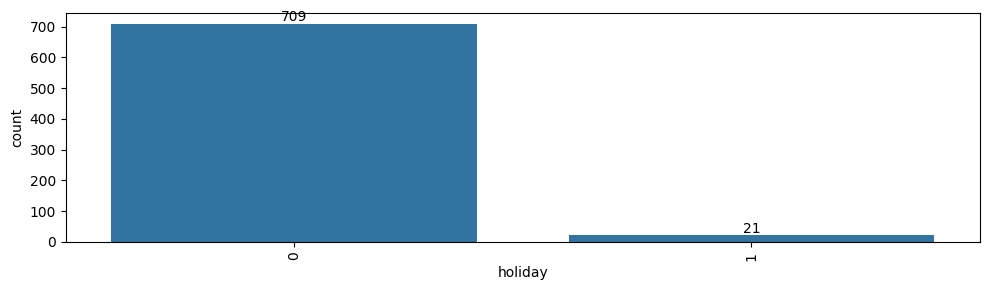

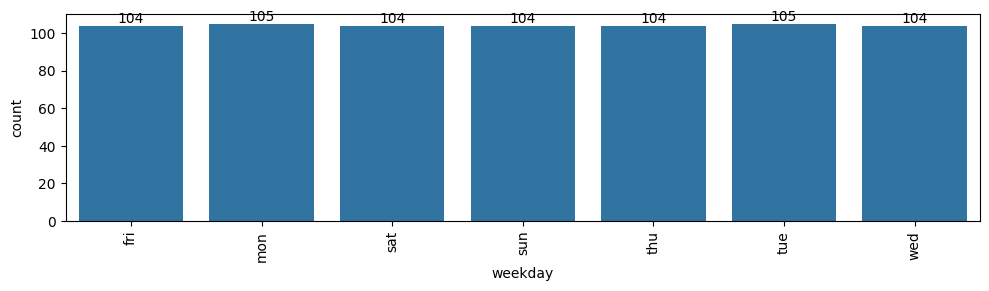

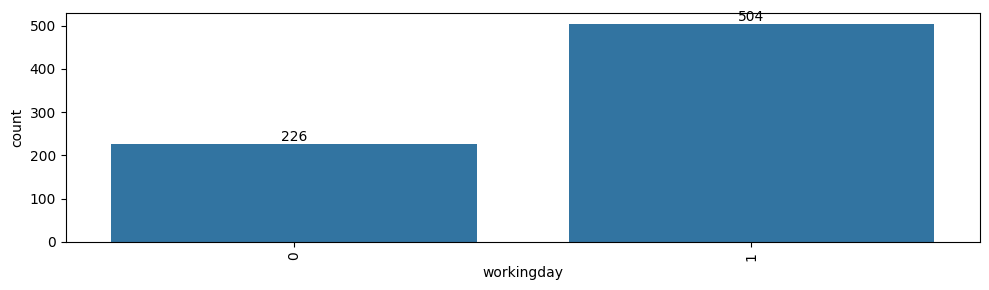

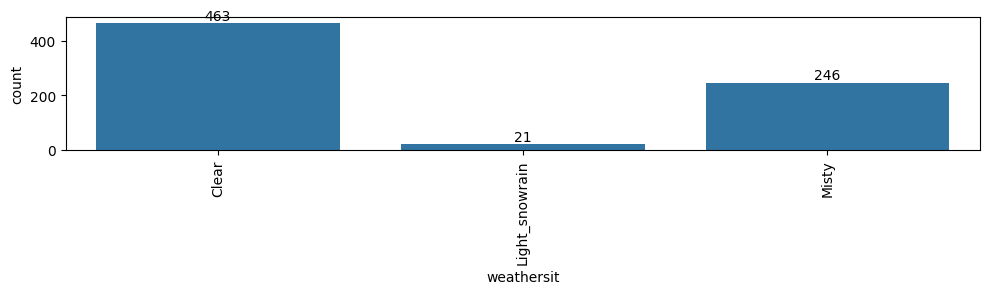

In [91]:
##Using Categorical Variables for Countplot

cat_cols = ["season","month", "holiday","weekday","workingday","weathersit"]
num_cols = ["temp","year","atemp","humidity", "windspeed"]

for col in cat_cols:
    bike_df[col] = bike_df[col].astype('category')
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x=bike_df[col])
    plt.xticks(rotation=90)

   # Add count values on top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    
    plt.tight_layout()
    plt.show()
     
     

## Observations from the Univariate Analysis of Categorical Variables

1) Preference for Bike Rentals is observed on Non Holidays or Working Days
2) Maximum Bike Rentals take place when the weather is Clear.
3) There is minimal variation across other categorical variables for Bike rentals

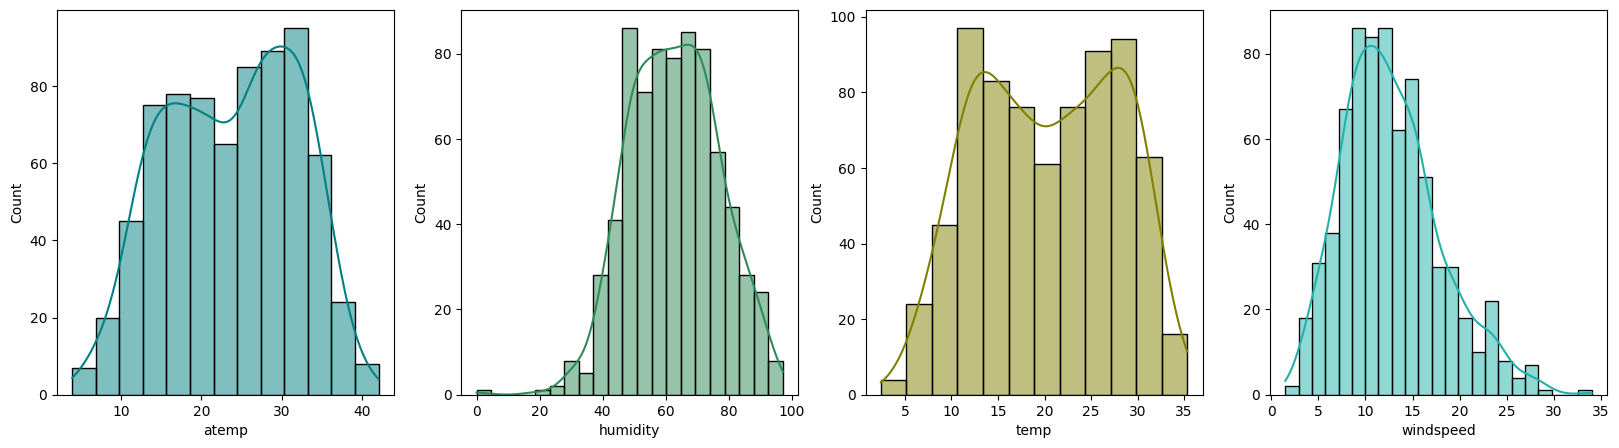

In [92]:
# Analysing the continuous (numerical) variables
# Plot Histogram

continuous_config = {
    'atemp': { 'color': 'teal' },
    'humidity': { 'color': 'seagreen' },
    'temp': { 'color': 'olive' },
    'windspeed': { 'color': 'lightseagreen' }
}

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))

for i, (cont, config) in enumerate(continuous_config.items()):
    sns.histplot(data = bike_df, x = cont, ax = ax[i], color = config['color'], kde = True)

plt.show()

## Observations from the Univariate Analysis of Numerical Variables

- Bikes were rented at an average temperature (temp) of 20°C.
- The average feeling temperature (atemp) during bike rentals is approximately 24°C.
- Humidity (hum) averaged around 62 during bike rentals.
- The average windspeed (windspeed) during bike rentals is approximately 12.

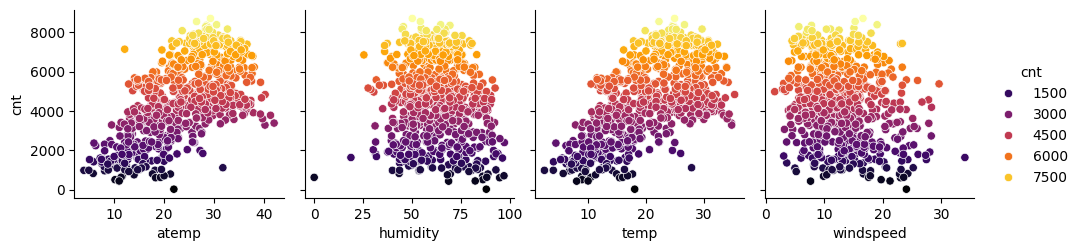

In [93]:
## Draw pairplot for continuous independent numeric variables against a dependent variable `cnt`
sns.pairplot(data = bike_df, x_vars = list(continuous_config.keys()), y_vars = ['cnt'], hue = 'cnt', palette = 'inferno')
plt.show()

**Correlation Analysis between Numerical Variables**

In [94]:
# Correlation between numerical variables
bike_df[list(continuous_config.keys()) + ['cnt']].corr(numeric_only = True)

,atemp,humidity,temp,windspeed,cnt
atemp,1.000000,0.141512,0.991696,-0.183876,0.630685
humidity,0.141512,1.000000,0.128565,-0.248506,-0.098543
temp,0.991696,0.128565,1.000000,-0.158186,0.627044
windspeed,-0.183876,-0.248506,-0.158186,1.000000,-0.235132
cnt,0.630685,-0.098543,0.627044,-0.235132,1.000000


**Heatmap**

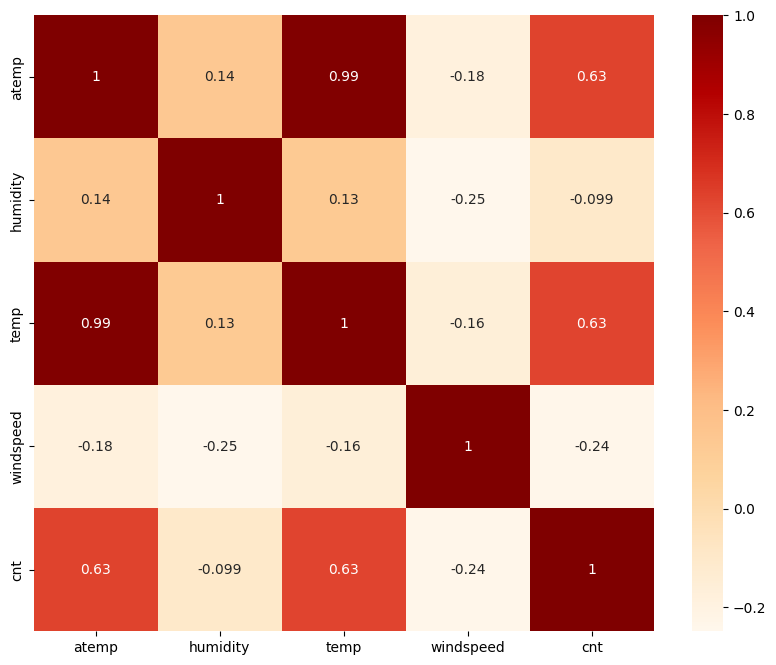

In [95]:
plt.figure(figsize = (10, 8))
corr_df = bike_df[list(continuous_config.keys()) + ['cnt']].corr(numeric_only = True)
sns.heatmap(data = corr_df, annot = True, cmap = 'OrRd')
plt.show()

**Observations from Correlation Analysis**
- atemp and temp have a very strong correlation suggesting possible redundancy.
    



## Step 2 : Data Preparation


**Creation of Dummy Variables (One Hot Encoding)**

**Dummy variables are only required if the categorical values are more than 2 unique values.**

**They dummy variables are always number of unique values - 1. We can drop any column, but generally, we drop the first column.**

In [96]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

**Removing the redundant columns from our dataframe**

--Excluded dteday as we already have month and year columns.

In [97]:
bike_df.drop(['casual', 'dteday', 'instant', 'registered'], axis = 1, inplace = True)

In [98]:
bike_df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [99]:
cat_cols = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']
bike_df[cat_cols].nunique()

season         4
year           2
month         12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

**Only the categorical variables - season, mnth, weekday, and weathersit, among those mentioned, have more than 2 unique values. Dummy variables will be created exclusively for these columns.**

In [100]:
### creating dummy variables for season , mnth ,weathersit ,weekday
dummy = bike_df[['season','month','weekday','weathersit']]

**Dropping the first column in each category (season, month, weekday, weathersit) reduces the number of dummy variables to (n - 1) for explaining n categories.**

In [101]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [102]:
## adding dummy variables to original dataset
bike_df = pd.concat([dummy,bike_df],axis = 1)

In [103]:
# Now let's see the head of our dataframe.
bike_df.head()

,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,...,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,True,False,False,False,False,False,True,False,False,False,...,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,True,False,False,False,False,False,True,False,False,False,...,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,True,False,False,False,False,False,True,False,False,False,...,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,True,False,False,False,False,False,True,False,False,False,...,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,True,False,False,False,False,False,True,False,False,False,...,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [104]:
# Inspecting the columns in dataframe
bike_df.columns

Index(['season_spring', 'season_summer', 'season_winter', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_july', 'month_june',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_snowrain',
       'weathersit_Misty', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'cnt'],
      dtype='object')

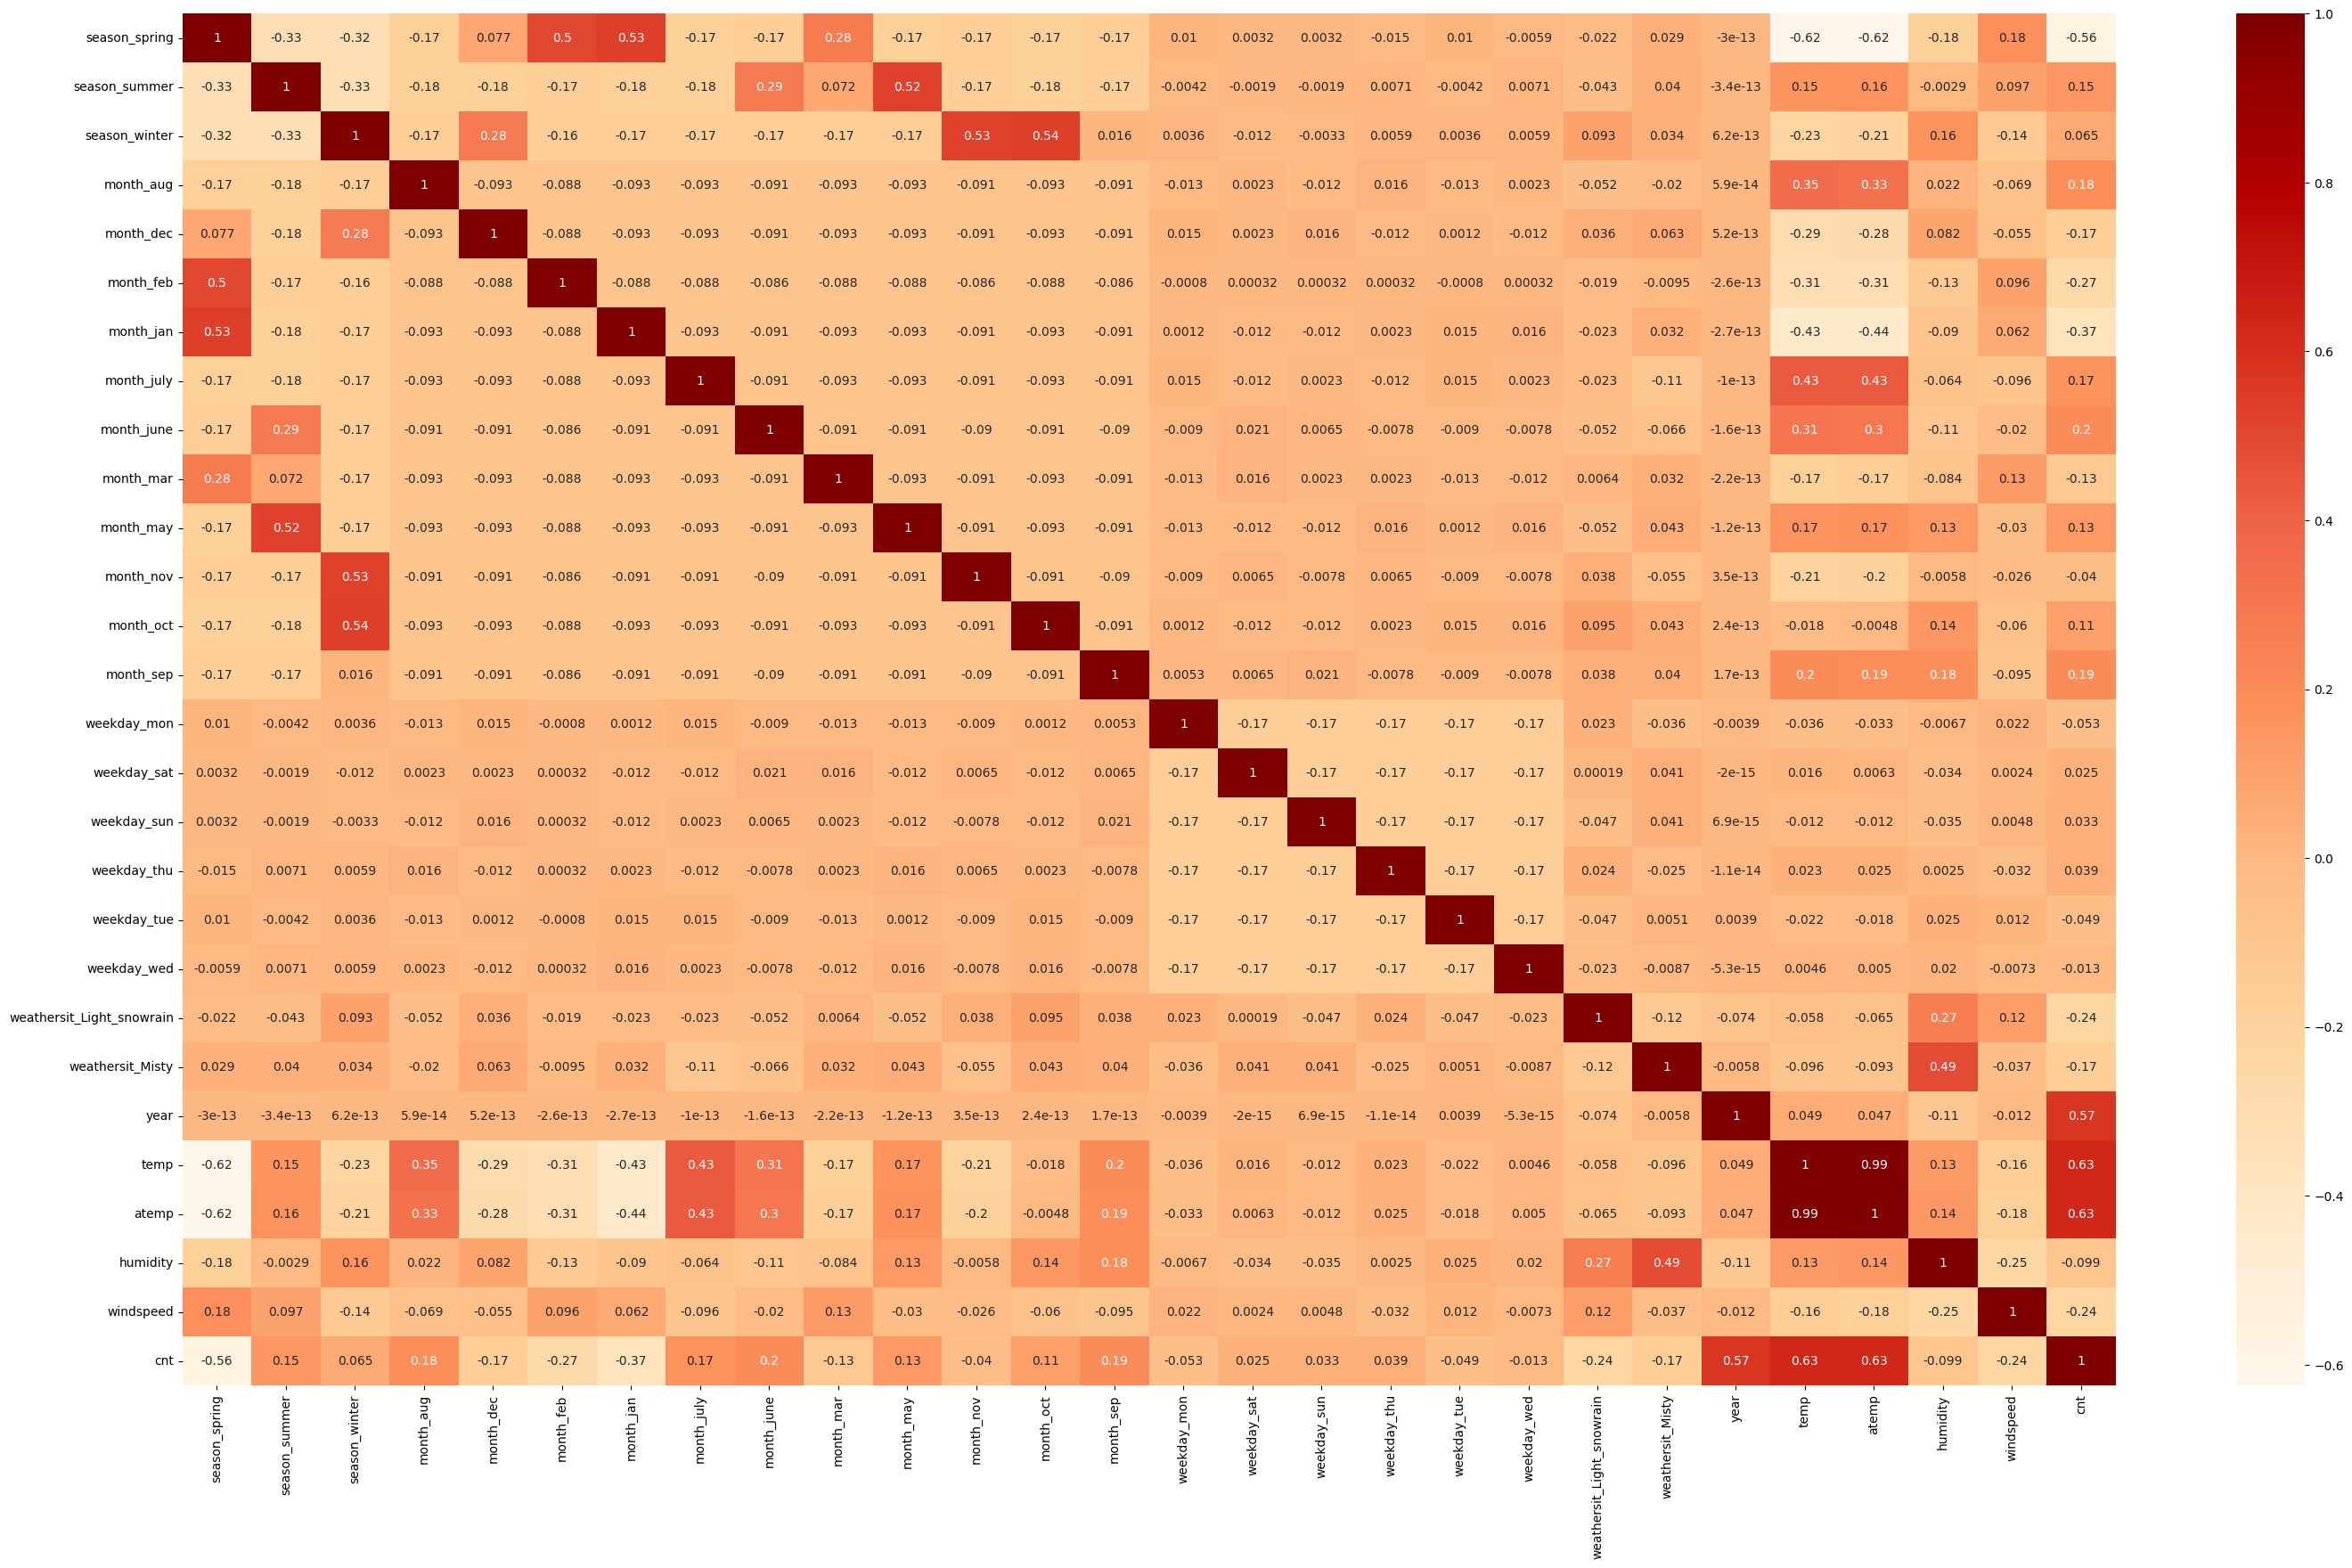

In [105]:
# Checking how are all these related to the dependent variable via correlation
plt.figure(figsize = (35, 20))
corr_df = bike_df[list(bike_df.columns)].corr(numeric_only = True)
sns.heatmap(data = corr_df, annot = True, cmap = 'OrRd')
plt.show()

In [106]:
bike_df.shape

(730, 34)

## Step 3: Model Building and Evaluation

In [107]:
# Getting the feature variables in X and dependent variable `cnt` in y
X = bike_df.drop('cnt', axis = 1)
y = bike_df['cnt']

The first step of regression is to perform a Train Test Split

In [108]:
### Splitting the data into 70% training set and a 30% test set.
X_train, X_test,y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [109]:
# Checking shape and size for train and test set
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(510, 33)
(510,)
(219, 33)
(219,)


In [110]:
# Inspect the head of the training set
X_train.head()

,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,...,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed
653,False,False,True,False,False,False,False,False,False,False,...,2019,oct,0,wed,1,Clear,19.201653,23.0423,55.8333,12.208807
576,False,False,False,False,False,False,False,True,False,False,...,2019,july,0,wed,1,Clear,29.246653,33.1448,70.4167,11.083475
426,True,False,False,False,False,False,False,False,False,True,...,2019,mar,0,sun,0,Misty,16.980847,20.6746,62.1250,10.792293
728,True,False,False,False,True,False,False,False,False,False,...,2019,dec,0,mon,1,Clear,10.489153,11.5850,48.3333,23.500518
482,False,True,False,False,False,False,False,False,False,False,...,2019,apr,0,sun,0,Misty,15.443347,18.8752,48.9583,8.708325


In [111]:
# Inspect the head of the training set
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [112]:
X_test.head()

,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,...,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed
184,False,False,False,False,False,False,False,True,False,False,...,2018,july,1,wed,0,Misty,29.793347,33.27085,63.7917,5.459106
535,False,True,False,False,False,False,False,False,True,False,...,2019,june,0,thu,1,Clear,32.082500,36.04875,59.2083,7.625404
299,False,False,True,False,False,False,False,False,False,False,...,2018,oct,0,sat,0,Misty,19.270000,22.85230,81.2917,13.250121
221,False,False,False,True,False,False,False,False,False,False,...,2018,aug,0,fri,1,Clear,31.433347,34.24915,42.4167,13.417286
152,False,True,False,False,False,False,False,False,True,False,...,2018,june,0,sat,0,Clear,29.315000,32.19710,30.5000,19.583229


In [113]:
y_test.head()

184    6043
535    6211
299    2659
221    4780
152    4968
Name: cnt, dtype: int64

## Min Max Scaler ##

In [117]:
scaler = MinMaxScaler()

In [119]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

NameError: name 'train' is not defined

## Feature Scaling using StandardScaler
StandardScaler is a preprocessing technique that transforms the features of a dataset to have a mean of 0 and a standard deviation of 1, ensuring consistent scales for machine learning algorithms sensitive to feature magnitudes.

In [114]:
# Use StandardScaler to scale values
scaler = StandardScaler()

# Fit and transform training set
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index, copy = false)

# Only Transform Test set
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index, copy = false)

ValueError: Cannot cast object dtype to float64

In [115]:
# Use StandardScaler to scale values
scaler = StandardScaler()

# Fit and transform training set
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)

# Only Transform Test set
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)


ValueError: Cannot cast object dtype to float64

In [116]:
# Inspect the training set after scaling
X_train_scaled.head()

NameError: name 'X_train_scaled' is not defined

In [68]:
# Create and train the model with RFE
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 15)

rfe = rfe.fit(X_train_scaled, y_train)

NameError: name 'X_train_scaled' is not defined

In [ ]:
rfe.support_

In [ ]:

# List of feature variables and their respective selection status and ranks
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

In [ ]:
# Get the columns which are selected using RFE approach
selected_features = X_train_scaled.columns[rfe.support_]

Manual Feature Elimination using statsmodels and VIF
Steps to be taken while performing Manual Feature Elimination:

Multicollinearity: Address high correlation between features.
Overfitting: Prevent the model from fitting noise in the data.
Interpretability: Simplify the model for better understanding.
Model Performance: Improve computational efficiency and generalization.
Data Quality: Eliminate irrelevant or redundant features for cleaner data.
Manual feature elimination requires identifying features with p-values exceeding 0.05, rendering their coefficients statistically insignificant, and having VIF values surpassing 5.

In [62]:
# Verifying column names which are selected
selected_features

NameError: name 'selected_features' is not defined

In [63]:
df_train, df_test = train_test_split(bike_df, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)
     

(510, 34)
(220, 34)


In [64]:
scaler = MinMaxScaler()


In [65]:
df_train[df_train.columns]= scaler.fit_transform(df_train[df_train.columns])


ValueError: Cannot cast object dtype to float64

In [ ]:
df_test[df_test.columns]= scaler.transform(df_test[df_test.columns])
df_test.head()

## Selecting Features using RFE ##

In [69]:
# Create and train the model with RFE
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 15)

rfe = rfe.fit(X_train_scaled, y_train)

NameError: name 'X_train_scaled' is not defined

In [ ]:
rfe.support_

In [ ]:
# List of feature variables and their respective selection status and ranks
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

In [ ]:
# Get the columns which are selected using RFE approach
selected_features = X_train_scaled.columns[rfe.support_]

In [120]:
# Verifying column names which are selected
selected_features

NameError: name 'selected_features' is not defined

In [ ]:
# Get the columns which are rejected using RFE approach
rejected_features = X_train_scaled.columns[~rfe.support_]